### Student Information
Name: Mohamed Syaheer Altaf (阿爾塔夫)

Student ID: 113065423

School: National Tsing Hua University

Github Username: syaheer-altaf

GitHub ID: 149253478

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__.

In [3]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 87.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5

# 1. Data Preparation

In [1]:
# Download and load the dataset using `datasets` module
from datasets import load_dataset

ds = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")
print(ds)

DatasetDict({
    train: Dataset({
        features: ['sentiment', 'comment'],
        num_rows: 1500
    })
})


# 2. Data Transformation

In [2]:
# main approach here: 1) to convert the dataset to a pandas dataframe.
#                     2) check for missing values to determine the next step.
#                     3) check for duplicate comments to determine the next step.
import pandas as pd
import numpy as np

df = pd.DataFrame(ds['train'])
print(df)

# this handles both nulls and any non-standard missing values like empty strings
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)  # convert empty or whitespace-only strings to np.nan

# checking for missing values in the dataset
print("\n\nCheck for nulls:\n")
print(df.isnull().sum())

# checking for duplicate comments in the dataset
print("\n\nCheck for duplicate comments:\n")
print(df.duplicated('comment').sum())

          sentiment                                            comment
0     not nostalgia  He was a singer with a golden voice that I lov...
1         nostalgia  The mist beautiful voice ever I listened to hi...
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4         nostalgia  listening to his songs reminds me of my mum wh...
...             ...                                                ...
1495  not nostalgia  i don't know!..but the opening of the video,.....
1496  not nostalgia  it's sad this is such a beautiful song when yo...
1497  not nostalgia  Dear Friend, I think age and time is not that ...
1498      nostalgia  I was born in 1954 and started to be aware of ...
1499      nostalgia  This is the first CD I bought after my marriag...

[1500 rows x 2 columns]


Check for nulls:

sentiment    0
comment      0
dtype: int64


Check for duplicate comments:

1


## a. Handling Missing Values

In [3]:
# drop rows with missing comments or sentiments (although it's 0 for both -- just in case) :)
df.dropna(inplace=True)

print("Check for nulls:\n")
df.isnull().sum()

Check for nulls:



sentiment    0
comment      0
dtype: int64

## b. Handling Duplicate Data

In [4]:
# keep one copy of duplicates in the 'comment' column
df = df.drop_duplicates(subset='comment', keep='first')

print("Check for duplicate comments:\n")
print(df.duplicated('comment').sum())

print("\nCleaned dataframe:\n")
print(df)

Check for duplicate comments:

0

Cleaned dataframe:

          sentiment                                            comment
0     not nostalgia  He was a singer with a golden voice that I lov...
1         nostalgia  The mist beautiful voice ever I listened to hi...
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4         nostalgia  listening to his songs reminds me of my mum wh...
...             ...                                                ...
1495  not nostalgia  i don't know!..but the opening of the video,.....
1496  not nostalgia  it's sad this is such a beautiful song when yo...
1497  not nostalgia  Dear Friend, I think age and time is not that ...
1498      nostalgia  I was born in 1954 and started to be aware of ...
1499      nostalgia  This is the first CD I bought after my marriag...

[1499 rows x 2 columns]


## c. Transforming Sentiments for Binary Classification

In [5]:
# making sure the labels are unique
print(df['sentiment'].unique())

['not nostalgia' 'nostalgia']


In [6]:
# map sentiment labels to binary format ('nostalgia' = 1, 'not nostalgia' = 0)
df['sentiment'] = df['sentiment'].map({'nostalgia': 1, 'not nostalgia': 0})
print(df)
# quick look at the sentiment distribution
print("\n\nSentiment distribution:\n")
print(df['sentiment'].value_counts())

      sentiment                                            comment
0             0  He was a singer with a golden voice that I lov...
1             1  The mist beautiful voice ever I listened to hi...
2             1  I have most of Mr. Reeves songs.  Always love ...
3             0  30 day leave from 1st tour in Viet Nam to conv...
4             1  listening to his songs reminds me of my mum wh...
...         ...                                                ...
1495          0  i don't know!..but the opening of the video,.....
1496          0  it's sad this is such a beautiful song when yo...
1497          0  Dear Friend, I think age and time is not that ...
1498          1  I was born in 1954 and started to be aware of ...
1499          1  This is the first CD I bought after my marriag...

[1499 rows x 2 columns]


Sentiment distribution:

sentiment
1    750
0    749
Name: count, dtype: int64


# 3. Data Preprocessing

## a. Tokenization of Comments

In [7]:
# main approach: tokenization and stopword removal
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['comment'])

# check the shape of the transformed data
print("Shape of the document-term matrix:\n")
print(X.shape)

Shape of the document-term matrix:

(1499, 3485)


## b. Initial Data Explorations and Visualizations for Feature Selection

The main idea here is to show the distribution of important tokens (or words) through various visualization and non-visualization means.

### i. Sort Top-10 Words

In [8]:
# simple word frequency distribution
word_freq = dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0]))

# sort and print the top 10 frequent words
sorted_word_freq = sorted(word_freq.items(), key=lambda item: item[1], reverse=True)
print(sorted_word_freq[:10])

[('song', 748), ('love', 309), ('music', 267), ('memories', 244), ('time', 213), ('great', 209), ('years', 184), ('beautiful', 172), ('like', 169), ('songs', 160)]


### ii. Visualizing using WordCloud

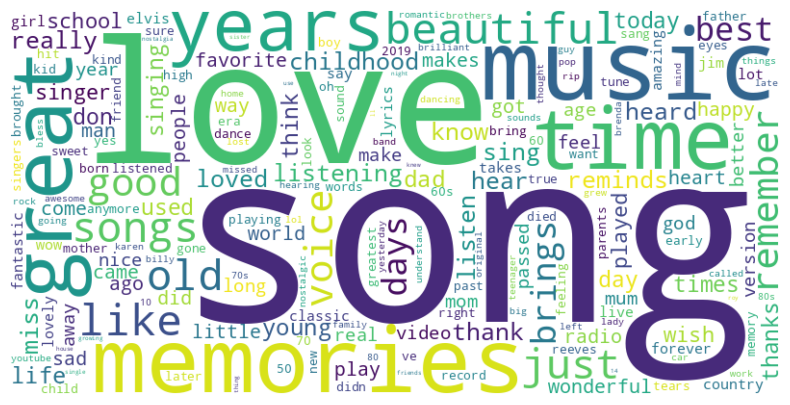

In [9]:
# we use wordcloud to have insight of important words
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### iii. Visualizing using Zipf's law (Log Scale)

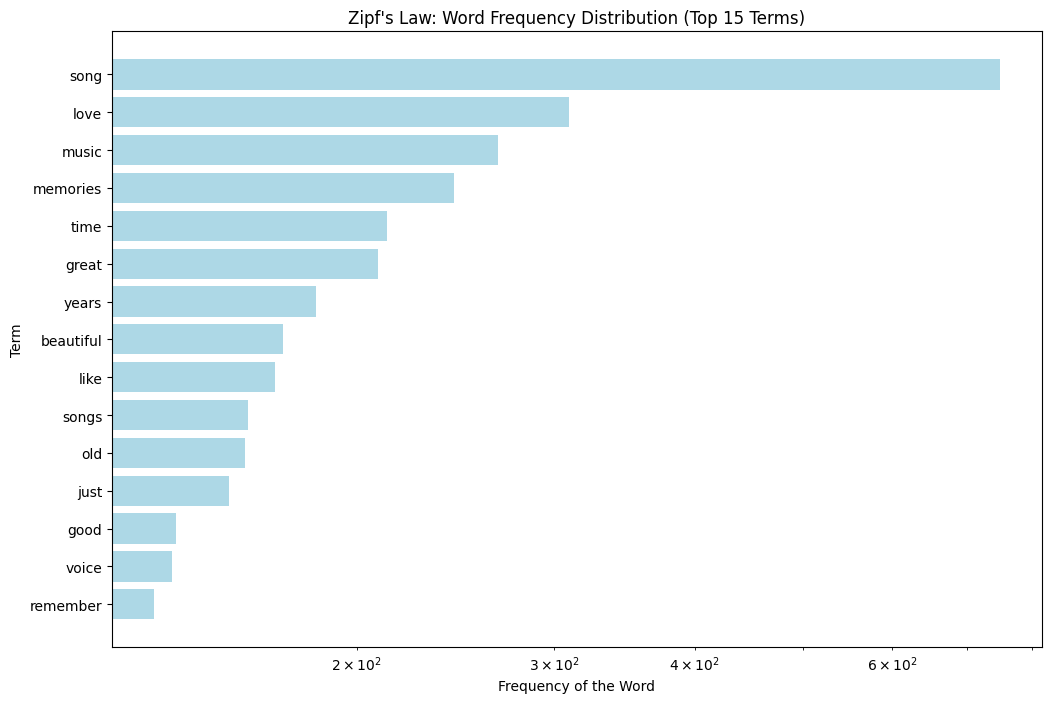

In [10]:
# define the number of top terms to display
num_terms_to_display = 15

# prepare data for Zipf's Law plot
terms, frequencies = zip(*sorted_word_freq[:num_terms_to_display])  # Limit to top N terms

# create a new dataframe for better manipulation
zipf_df = pd.DataFrame({'Term': terms, 'Frequency': frequencies})

# create a long-tail plot (terms vs. frequency)
plt.figure(figsize=(12, 8))
plt.barh(zipf_df['Term'], zipf_df['Frequency'], color='lightblue')
plt.xlabel('Frequency of the Word')
plt.ylabel('Term')
plt.title(f"Zipf's Law: Word Frequency Distribution (Top {num_terms_to_display} Terms)")
plt.gca().invert_yaxis()  # invert y-axis for better visualization
plt.xscale('log')  # log scale for frequency to show the long tail effect
plt.show()

### iv. TF-IDF Visualization

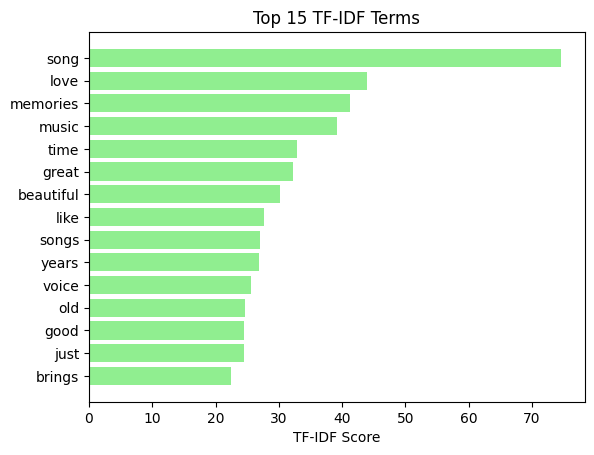

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt

# create tf-idf features, with additional parameters
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95,     # ignore terms that appear in more than 95% of documents
    min_df=2,        # ignore terms that appear in less than 2 documents
    ngram_range=(1, 2),  # use unigrams and bigrams
    stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df['comment'])

# Convert to a new dataframe for easier visualization
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# sum the tf-idf scores for each term across all documents
tfidf_sum = tfidf_df.sum(axis=0)

# sort and get top 15 terms
top_n = 15
sorted_tfidf = sorted(zip(tfidf_sum.index, tfidf_sum.values), key=lambda item: item[1], reverse=True)

# plotting the top 15 TF-IDF terms
terms, scores = zip(*sorted_tfidf[:top_n])
plt.barh(terms, scores, color='lightgreen')
plt.xlabel('TF-IDF Score')
plt.title('Top 15 TF-IDF Terms')
plt.gca().invert_yaxis()  # invert y-axis for better visualization
plt.show()

In [12]:
# The key difference between Zipf's law and TF-IDF visualization lies in their focus:
#
#   Zipf's law shows the frequency distribution of words across all comments.
#   It highlights how a few words that are super common, while many others
#   are rare, creating that long tail effect. This helps us see the overall language
#   usage in our dataset.
#
#   On the other hand, TF-IDF focuses on the importance of words in the context of our
#   specific dataset. It weighs the frequency of words but also considers how common
#   they are across all documents. So, a word that pops up often in one comment but isn't
#   common elsewhere gets a higher score, indicating it's more relevant for that comment's
#   sentiment.
#
# In short, Zipf's law gives us a broad view of word usage, while TF-IDF helps us zero in
# on what's important for our analysis. Which is why we will use the latter for our feature selection.


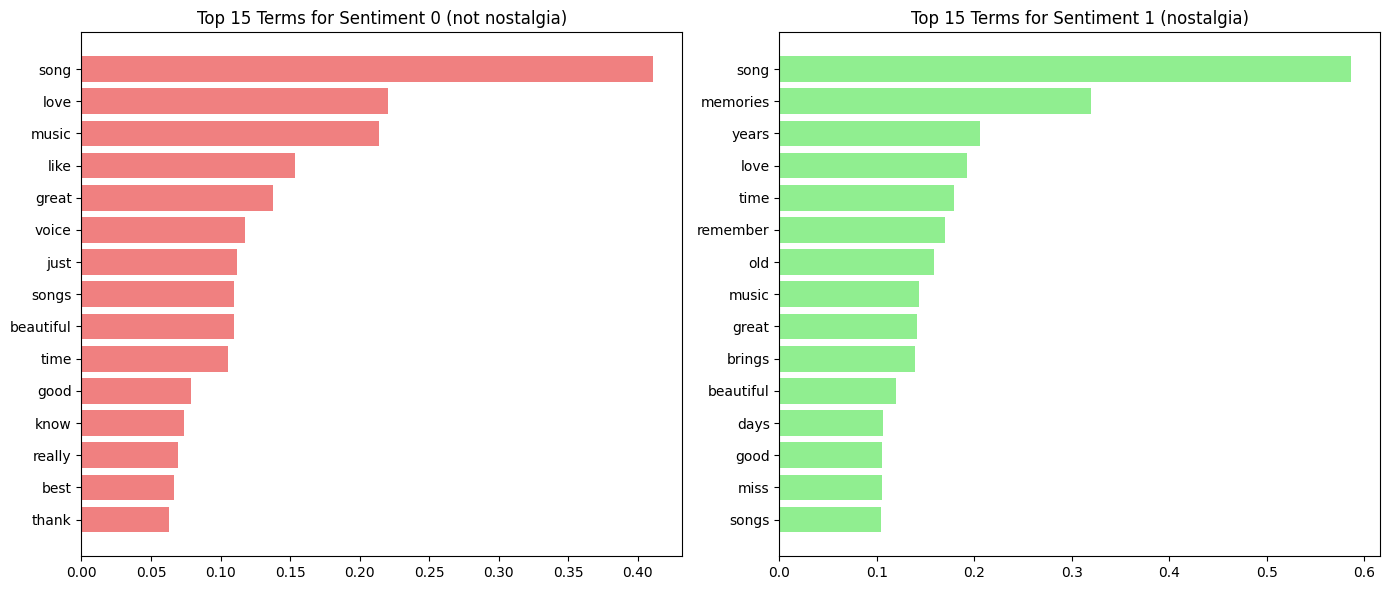

In [13]:
# we look at terms significant to each document,
# sentiment 0 : not nostalgic
# sentiment 1: nostalgic
# this is to gauge a better understanding for the top terms selected for each labels.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sentiment_0_mask = (df['sentiment'] == 0)
sentiment_1_mask = (df['sentiment'] == 1)

# separate the document-term matrix based on sentiment
X_sentiment_0 = X[sentiment_0_mask]
X_sentiment_1 = X[sentiment_1_mask]

# compute the average term frequencies for each sentiment class
avg_term_freq_0 = np.array(X_sentiment_0.sum(axis=0)).flatten() / X_sentiment_0.shape[0]
avg_term_freq_1 = np.array(X_sentiment_1.sum(axis=0)).flatten() / X_sentiment_1.shape[0]

# get feature (i.e., term) names
terms = vectorizer.get_feature_names_out()

# create a new dataframe for easier visualization
df_0 = pd.DataFrame({'Term': terms, 'Avg_Freq': avg_term_freq_0})
df_1 = pd.DataFrame({'Term': terms, 'Avg_Freq': avg_term_freq_1})

# sort by average frequency
df_0_sorted = df_0.sort_values(by='Avg_Freq', ascending=False).head(15)
df_1_sorted = df_1.sort_values(by='Avg_Freq', ascending=False).head(15)

# Plot top 15 terms for each sentiment class
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Sentiment 0
axes[0].barh(df_0_sorted['Term'], df_0_sorted['Avg_Freq'], color='lightcoral')
axes[0].set_title('Top 15 Terms for Sentiment 0 (not nostalgia)')
axes[0].invert_yaxis()

# Sentiment 1
axes[1].barh(df_1_sorted['Term'], df_1_sorted['Avg_Freq'], color='lightgreen')
axes[1].set_title('Top 15 Terms for Sentiment 1 (nostalgia)')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

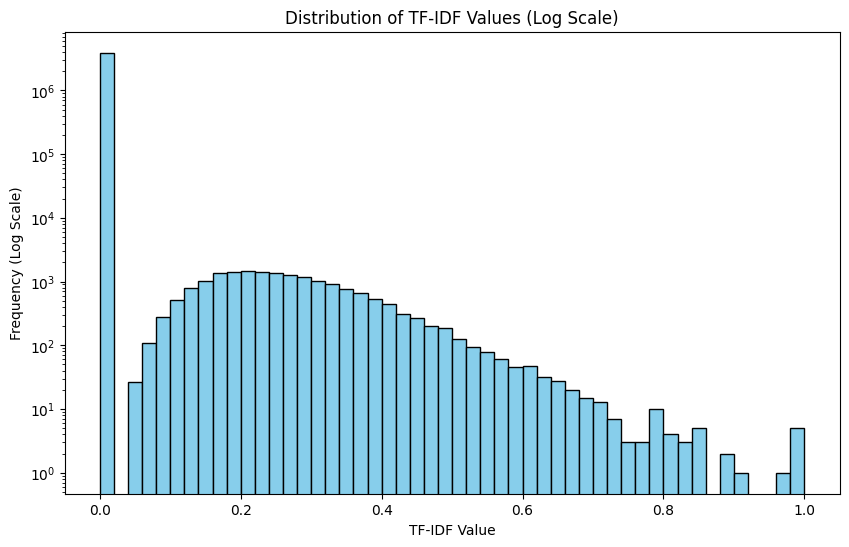

In [14]:
# this is to show the sparsity of the data -- thereby requiring more pre-processing
import matplotlib.pyplot as plt
import numpy as np

# convert the TF-IDF matrix to a dense format (array) for easier plotting
tfidf_dense = X_tfidf.toarray()

# flatten the matrix to get a 1D array of all TF-IDF values
tfidf_values = tfidf_dense.flatten()

# plot a histogram of TF-IDF values in log scale to show sparsity
plt.figure(figsize=(10, 6))
plt.hist(tfidf_values, bins=50, log=True, color='skyblue', edgecolor='black')
plt.title("Distribution of TF-IDF Values (Log Scale)")
plt.xlabel("TF-IDF Value")
plt.ylabel("Frequency (Log Scale)")

plt.show()

In [15]:
# we denote the sparsity of the data as there is a spike at 0.0 for tf-idf values
# which suggests a good number of terms does not present in most documents
# i.e., significant portion of document-term matrix is filled with zeroes.
# this might call for dimensionality reduction.
# I did use Truncated Singular Value Decomposition (Truncated SVD), but this resulted in negative values for tf-idf which
# is not suitable for multinomial naive bayes classifier.
# after certain amount of trial and error, I only consider the top features.

## c. Dimensionality Reduction

In [16]:
# using scikit-learn to select k top features
from sklearn.feature_selection import SelectKBest, chi2

k = 1024  # can fine tune this parameter
selector = SelectKBest(score_func=chi2, k=k)
X_tfidf_reduced = selector.fit_transform(X_tfidf, df['sentiment'])
print(X_tfidf.shape)
print(X_tfidf_reduced.shape)

(1499, 2614)
(1499, 1024)


## d. Feature Normalization

In [17]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler with with_mean=False
scaler = StandardScaler(with_mean=False)

# Fit and transform the sparse matrix
X_tfidf_reduced_normalized = scaler.fit_transform(X_tfidf_reduced)

# 4. Data Classification

## a. Multinomial Naive Bayes Model

In [18]:
# re-import necessary modules for this last step
import pandas as pd
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# split the feature set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_tfidf_reduced, df['sentiment'], test_size=0.2, random_state=42
)

# train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)  # Train on the enhanced dataset
print("Done training...")

Done training...


## b. Evaluating the Model

In [19]:
# make predictions on the validation set
y_pred = model.predict(X_val)

# evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
precision = precision_score(y_val, y_pred, average='weighted')
print(f"Precision: {precision:.2f}")
recall = recall_score(y_val, y_pred, average='weighted')
print(f"Recall: {recall:.2f}")
from sklearn.metrics import f1_score

f1 = f1_score(y_val, y_pred, average='weighted')
print(f"F1 Score: {f1:.2f}")

Model Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1 Score: 0.90


## c. Confusion Matrix

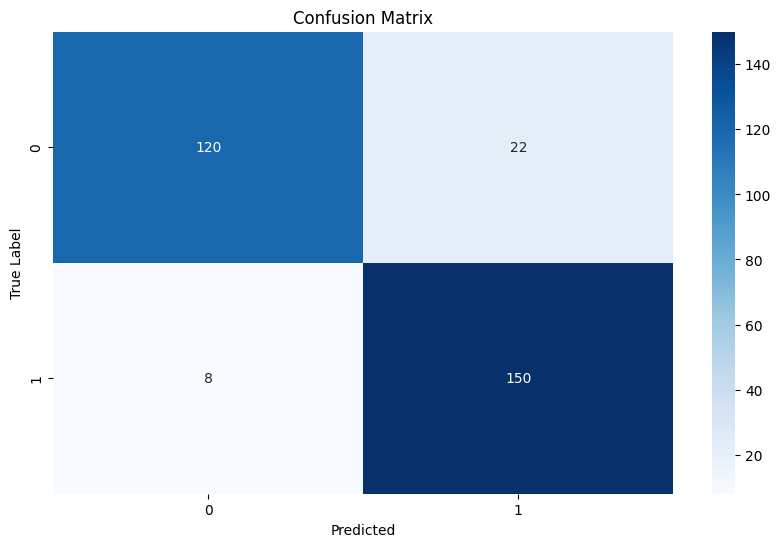

In [20]:
# confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()